In [1]:
import numpy as np
from scipy.interpolate import splrep, splev
from scipy.integrate import quad
import pylab as plt

## SMF test part

In [2]:
# del SMF_Driver_ETGs
# del SMF_Driver_LTGs
from foreground_model import SMF_Driver_ETGs, SMF_Driver_LTGs
smf = SMF_Driver_ETGs()
def phi_M(M):
    M_star = 10**smf.logM_star
    phi = 10**smf.logphi
    # phi = 10**-2.5
    alpha = 1+smf.alpha
    # alpha = 0.524
    return np.exp(-M/M_star)*phi*(M/M_star)**alpha

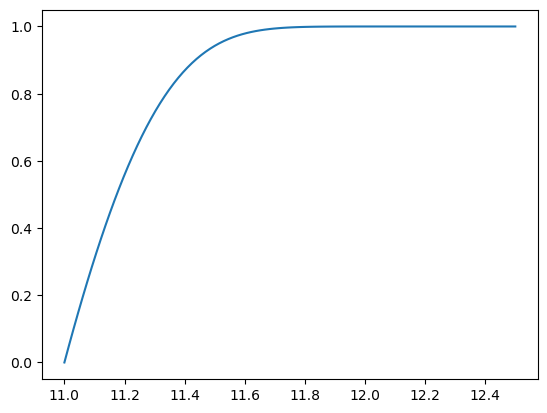

In [4]:
x = np.linspace(11,12.5,100)
y = smf.CDF(x)
plt.plot(x,y)

In [14]:
len(splev(x, splrep(x, y)))

1000

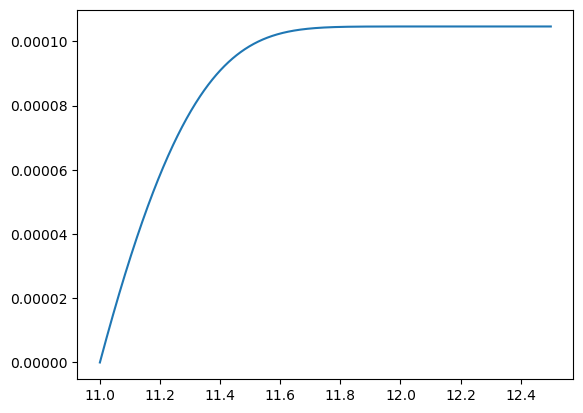

In [15]:
plt.plot(x,y)  

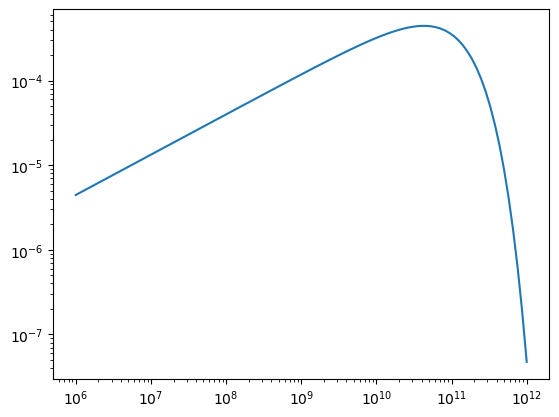

In [36]:
M_ar = np.logspace(6,12,100)
phi_ar = phi_M(M_ar)
plt.plot(M_ar,phi_ar)
plt.yscale('log')
plt.xscale('log')

## redshift distribution test part

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.differential_comoving_volume(1)

<Quantity 2.65507557e+10 Mpc3 / sr>

In [3]:
z_ar = np.linspace(0,1.5,10000)
com_dist = cosmo.comoving_distance(z_ar).value
dcomdz = np.gradient(com_dist, z_ar)
# plt.plot(z_ar, dcomdz)
cosmo.comoving_distance(1).value**2*splev(1, splrep(z_ar, dcomdz))/cosmo.differential_comoving_volume(1).value

1.0000000016176376

In [4]:
from foreground_model import Redshift_Distribution
rd = Redshift_Distribution()

1.0


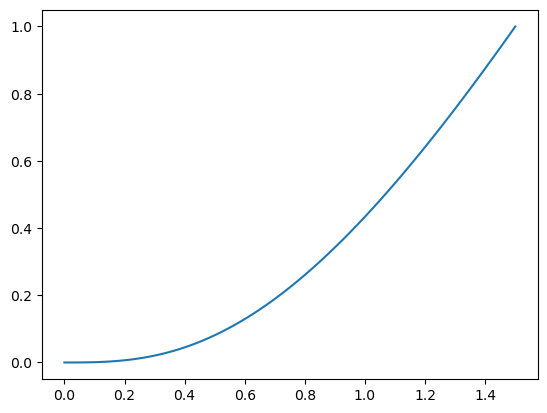

In [6]:
z = np.linspace(0,1.5,100)
plt.plot(z, rd.CDF(z))
print(rd.CDF(1.5))